# Part I - Loan Data from Prosper
## by Fabi Daniel


## Table of Contents


![LOANS](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQGxjGPrplFt0Ybo13JoGVhSh0LY26SGJUwQ&usqp=CAU)


<a id='intro'></a>
## Introduction

The *task* is to accurately determine the ***factors*** that affect the *Loan Outcome status* and to give an answer to the *Question* how *well* are the Prosper Loans Doing? Special Focus was put on some variables based on the assumption that the **Rates**, **Principal** and **Term** are important in any loan Situation.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, term, borrower income, and many others. The dataset was later trimmed to 12 columns removing columns that are surplus to our investigation and deleting rows with Null Values 

The loan status variable which was already a categorical variable was further categorized (***not explicitly***) into two distinct values from the perspective of the Loan Facilitator, Prosper. `Positive Loan Status` and `Negative Loan Status`
* **Positive Loan Status**: This basically is for Loans that are healthy i.e currently running, loans in their final stages and loans already completed
* **Negative Loan Status**: This is for Loans that are unhealthy i.e Cancelled, Chargedoff and Past Due


<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



### Data Gathering

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load dataset
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Assessment

In this section, I will examine for quality, tidiness and relevance to our analysis

In [3]:
loans.shape

(113937, 81)

### What is the structure of the dataset?

- The total observations (row) in the dataset is 113937
- The total attributes (column) in the dataset is 81

In [4]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# check for duplicates
loans.duplicated().value_counts()

False    113937
dtype: int64

There are no duplicates in our rows or columns, however, there are some columns that are not relevant for our analysis. This will be treated in our Data Cleaning stage.


In [6]:
# Check for nulls
loans.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

From the assessment, most of the null values are from columns that are not relevant to our analysis. I will dig deeper into that during our data cleaning stage. I think I should get into the data cleaning stage already 


### What is/are the main feature(s) of interest in the dataset?

- Term
- LoanStatus 
- BorrowerAPR
- BorrowerRate
- LoanOriginalAmount



### What features in the dataset will help support the investigation into the feature(s) of interest?

- Occupation 
- ProsperRating (Alpha)
- EmploymentStatus
- StatedMonthlyIncome
- IsBorrowerHomeowner
- MonthlyLoanPayment

In [7]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
loans[['ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'CreditGrade','BorrowerRate',
       'LenderYield']].sample(20)

,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,CreditGrade,BorrowerRate,LenderYield
72178,2.0,E,2.0,NaN,0.2712,0.2612
99739,NaN,NaN,NaN,E,0.2000,0.1825
67055,3.0,D,6.0,NaN,0.2699,0.2599
68292,5.0,B,6.0,NaN,0.1819,0.1719
80043,5.0,B,6.0,NaN,0.1519,0.1419
36290,6.0,A,9.0,NaN,0.1039,0.0939
66854,7.0,AA,10.0,NaN,0.0955,0.0855
55919,NaN,NaN,NaN,D,0.1800,0.1750
56932,5.0,B,4.0,NaN,0.1500,0.1400
107236,3.0,D,6.0,NaN,0.2870,0.2770


### Data Cleaning

In [9]:
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [10]:
# Filter for relevant columns
loans_df = loans[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation','EmploymentStatus', 'LoanOriginalAmount','IsBorrowerHomeowner',  'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 'ListingCategory (numeric)']]

loans_df.sample(20)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,IsBorrowerHomeowner,MonthlyLoanPayment,StatedMonthlyIncome,ProsperRating (Alpha),ListingCategory (numeric)
43724,36,Current,0.22712,0.1899,Computer Programmer,Employed,5800,True,212.58,5501.416667,C,15
41096,60,Current,0.18965,0.1660,Computer Programmer,Employed,15000,True,369.57,6833.333333,C,2
10412,36,Current,0.33973,0.2999,Computer Programmer,Employed,2000,True,84.89,5604.083333,E,2
26002,60,Current,0.18913,0.1655,Clerical,Employed,19000,True,467.61,8166.666667,C,1
28383,36,Current,0.18214,0.1459,Executive,Employed,25000,True,861.62,23333.333333,B,1
59926,60,Current,0.12716,0.1049,Other,Employed,16000,True,343.82,11250.000000,A,1
93982,36,Current,0.35797,0.3177,Other,Self-employed,4000,True,173.71,6250.000000,HR,1
95469,36,Current,0.28032,0.2419,Other,Employed,10000,False,393.33,5833.333333,D,7
21282,60,Defaulted,0.26528,0.2398,Other,Employed,11000,True,316.32,2812.083333,C,2
49775,60,Current,0.24036,0.2155,Professional,Employed,10000,False,273.64,8166.666667,D,1


In [11]:
# drop nulls 
loans_df = loans_df.dropna(axis=0)

In [12]:
# test for nulls 
loans_df.isnull().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
Occupation                   0
EmploymentStatus             0
LoanOriginalAmount           0
IsBorrowerHomeowner          0
MonthlyLoanPayment           0
StatedMonthlyIncome          0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
dtype: int64

In [13]:
loans_df.shape

(83520, 12)

### What is the structure of the dataset?

- The total **observations (row)** in the dataset is **83520**
- The total **attributes (column)** in the dataset is **11**


Now, I have treated the missing values. After Data Cleaning, I am left with **83520** observations and **11** columns, this is sufficient for my analysis and represent a very large percentage of the whole dataset.
I will move **forward** to **Univariate Exploration**.


<a id='visual'></a>
## Data Visualization

## Univariate Exploration











In [14]:
loans_df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,IsBorrowerHomeowner,MonthlyLoanPayment,StatedMonthlyIncome,ProsperRating (Alpha),ListingCategory (numeric)
1,36,Current,0.12016,0.0920,Professional,Employed,10000,False,318.93,6125.000000,A,2
3,36,Current,0.12528,0.0974,Skilled Labor,Employed,10000,True,321.45,2875.000000,A,16
4,36,Current,0.24614,0.2085,Executive,Employed,15000,True,563.97,9583.333333,D,2
5,60,Current,0.15425,0.1314,Professional,Employed,15000,True,342.37,8333.333333,B,1
6,36,Current,0.31032,0.2712,Sales - Retail,Employed,3000,False,122.67,2083.333333,E,1


#### Question 1


How many **loans** are still currently **running**?

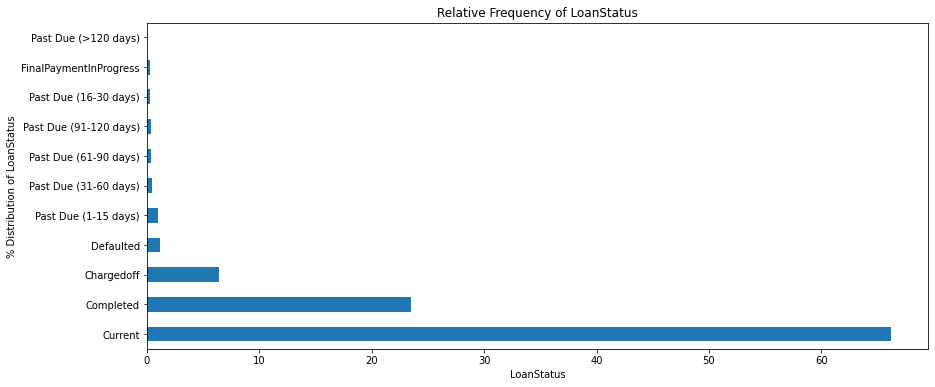

In [15]:

#Explore the LoanStatus

# Define myCountplot function
def myCountplot(xVar,rot=0, color=sb.color_palette()[0],figsize=[14,6],reindex=None,kind='bar'):
    """Description: This function can be used to plot a univariate plot that counts the frequency of a variable
    
    Arguments: 
    xVar: This parameter represents the variable and takes in a series object
    rot: for rotation of the
    color: There is a default value
    figsize: Takes in a list that represent the dimension of the graph
    reindex: There is a default value of None(
    kind: This determines the type of Chart
    
    Returns:
    A graphical reprementation that shows the frequency of the variable."""

    
    if figsize:
        plt.figure(figsize=figsize)

    loans_df[xVar].value_counts(normalize=True).mul(100).reindex(index=reindex).plot(kind=kind, color=color,rot=rot)


    plt.title(f'Relative Frequency of {xVar}')

    if kind =='bar':
        plt.ylabel(f'% Distribution of {xVar}')
        plt.xlabel(xVar)

    else:
        plt.ylabel(f'% Distribution of {xVar}')
        plt.xlabel(xVar)




    
myCountplot('LoanStatus',kind= 'barh')



<div align="center">Fig 1: Relative Frequency of Loan Status </div>


> More than `50%` of Prosper loans are *currently still running*, whereas loan status *Completed* have second most number of counts, representing `30%` of the whole dataset.






#### Question 2

How long **(expressed in months)** are the **loan periods**?

In [16]:
# Get overview of term attribute
loans_df.Term.value_counts()

36    57621
60    24286
12     1613
Name: Term, dtype: int64

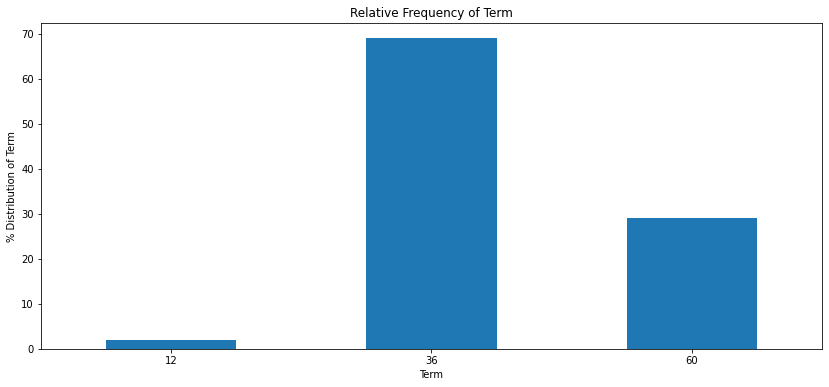

In [17]:
# plot for Term using myCountplot
myCountplot('Term', reindex=[12,36,60])

<div align="center">Fig 2: Relative Frequency of Term </div>


* More than `70%` of the loans have a period of `3` years(`36` months). This represents the majority of the population. 
* 12 months Loans are hardly subscribed to and represent a small distribution of the dataset

#### Question 3

**BorrowerAPR Distribution** 

Annual Percentage Rate (APR) is the interest charged for borrowing that represents the actual yearly cost of the loan expressed as a percentage.
                                                                                                **- Investopedia**
                                                                                                

In [18]:
# Get an overview of this attribute
loans_df.BorrowerAPR.sample(10)

106420    0.14857
96646     0.29510
75748     0.20524
64088     0.27462
35592     0.11563
44192     0.16175
38978     0.27462
21561     0.12400
949       0.31032
32495     0.22454
Name: BorrowerAPR, dtype: float64

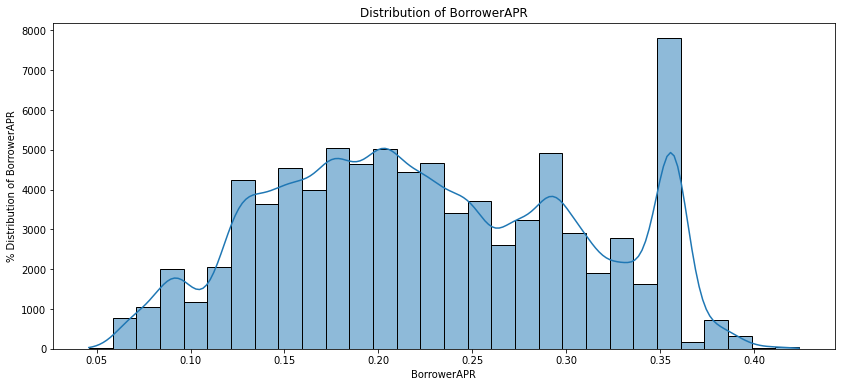

In [19]:
# Define distribution functions
def myDistribution(data, x,kde=True,bins=30, color=sb.color_palette()[0],figsize=[14,6]):

    """Description: This function can be used to plot a univariate plot that shows the distribution of a variable
    Arguments: 
    data: The datarame that contains the variable, takes in a DataFrame object
    x: The variable takes in a string object
    color: There is a default value
    figsize: Takes in a list that represent the dimension of the graph
    
    
    Returns:
    A graphical reprementation that shows the distribution of the variable."""

    plt.figure(figsize=figsize)

    

    

    sb.histplot(data=data,x=x,color=color, bins=bins,kde=kde)



    plt.title(f'Distribution of {x}')

    
    plt.ylabel(f'% Distribution of {x}')
    plt.xlabel(f'{x}')

    


myDistribution(data=loans_df, x='BorrowerAPR')

    
    

<div align="center">Fig 3: Distribution of BorrowerAPR </div>


* From this chart, The APR mean falls within the `20%` range for most borrowers. Do not forget that the APR is the actual/real interest that includes even the transaction fees. I can go forward to investigate the nominal interest rate

#### Question 4

**BorrowerRate** Distribution

In [20]:
# Overview
loans_df.BorrowerRate.sample(10)

70826     0.1984
19619     0.1626
80658     0.2639
3015      0.1900
34318     0.2958
103006    0.1768
80920     0.2804
32207     0.1100
35957     0.1579
13335     0.2310
Name: BorrowerRate, dtype: float64

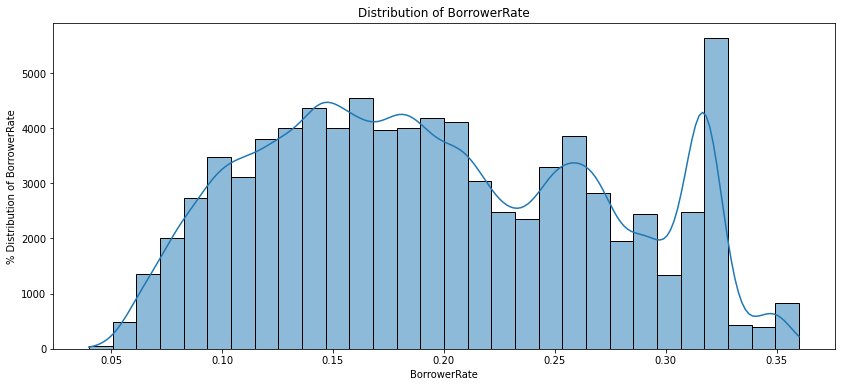

In [21]:
# plot for BorrowerRate
myDistribution(loans_df,'BorrowerRate')

<div align="center">Fig 4: Distribution of BorrowerRate </div>


> From this, the most ***occuring*** borrower rate is in the range of `15%` to `20%`
- Even without doing a bivariate visualization, I can see some similarities from the above two plots in the way the rates are distributed. 
- I will like to further investigate the loan amount for support

#### Question 5


**LoanOriginalAmount** Distribution

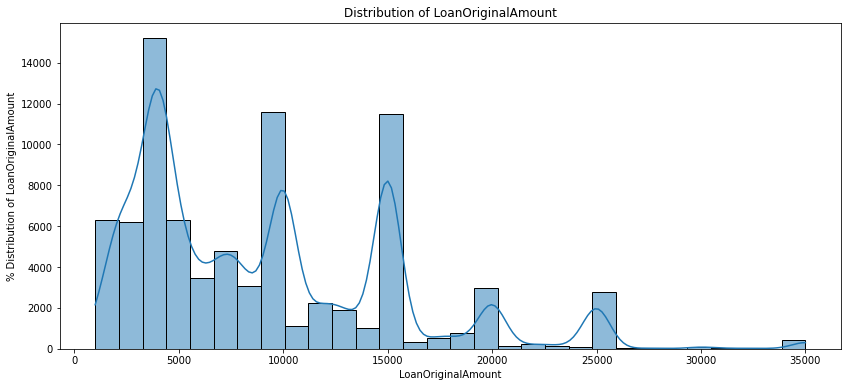

In [22]:
# plot distribution of LoanOriginalAmount

myDistribution(loans_df,'LoanOriginalAmount')

<div align="center">Fig 5: Distribution of LoanOriginalAmount </div>


> I can say this is a rightly skewed distribution, more of the data are closer to the lower range.
> I will further explore the relationship between the loanamount and rates attributes in sections coming below, Let's see how it goes


#### Question 6

Ratio of Unemployed borrowers?

In [23]:
# Overview
loans_df.EmploymentStatus.value_counts()

Employed         67310
Full-time         7926
Self-employed     4538
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

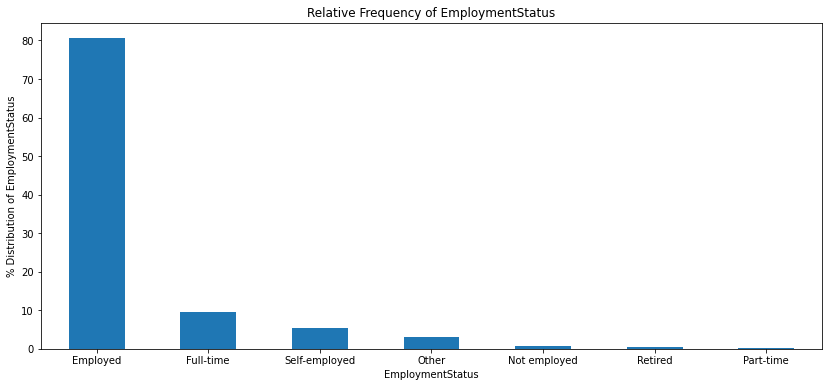

In [24]:

# Relative Frequency of Employment Status
myCountplot('EmploymentStatus')

<div align="center">Fig 6: Relative Frequency of Employment Status </div>


* 80% of the Population is employed, there are some other values, needs refinement.

> I will refine the EmploymentStatus column to arrive at two unique values; it's either you are employed or not. 
- Values such as [Full-time, Self-employed, Part-time, Employed] will be categorised as Employed
- While Values such as [Other, Not available, Retired , Not employed] will be categorised as Not_employed


In [25]:
# loans_df.loc[loans_df.EmploymentStatus.isin(['Full-time', 'Self-employed', 'Part-time', 'Employed'])]['EmploymentStatus'] = 'Employed'
# Define a function that categorises

def change_value(x):
    """Description: This function checks an observation and categorises it under two different categorise (Employed & Unemployed)
    
    Arguments: 
    x = the observation, it takes in a String
    
    
    Returns:
    x"""
    
    if x in ['Full-time', 'Self-employed', 'Part-time', 'Employed']:
        x='Employed'
    else:
        x='Unemployed'

    return  x

loans_df['EmploymentStatusCategory'] = loans_df.EmploymentStatus.map(change_value)

In [26]:
print(loans_df.EmploymentStatus.value_counts())

emp_status = loans_df.EmploymentStatusCategory.value_counts().index
print(emp_status)
# loans_df['EmploymentStatus']= pd.api.types.CategoricalDtype(ordered=True, categories=emp_status)

Employed         67310
Full-time         7926
Self-employed     4538
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64
Index(['Employed', 'Unemployed'], dtype='object')


In [27]:
loans_df.EmploymentStatusCategory.value_counts()

Employed      80030
Unemployed     3490
Name: EmploymentStatusCategory, dtype: int64

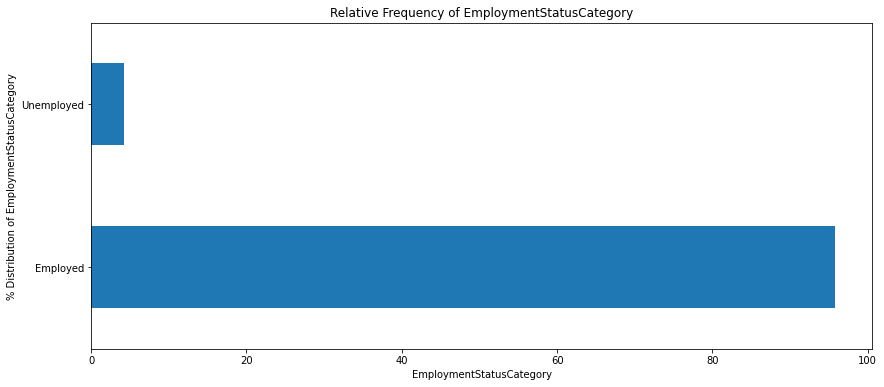

In [28]:
# plot for EmploymentStatusCategory
myCountplot('EmploymentStatusCategory',kind='barh')

<div align="center">Fig 7: Chart of Employment Status </div>


> After re-engineering of the employment variables, the above visualization gives a much more detailed description of the employment status of the borrowers which is very key in the loan process

* More than `90%` of the borrowers claimed to have a job. 
* Employment Status is not a good factor of LoanStatus as majority of borrowers are employed.

> Area of further interests include knowing the distribution of occupation 
> Their monthlyincome and monthlypayments etc

#### Question 7

The most common occupation?

- Distribution of occupation (for only employed borrowers). 


In [29]:
loans_df.sample(10)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,IsBorrowerHomeowner,MonthlyLoanPayment,StatedMonthlyIncome,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatusCategory
27360,60,Current,0.19323,0.1695,Executive,Employed,8500,False,211.02,8000.000000,C,1,Employed
2132,36,Completed,0.11296,0.0920,Sales - Retail,Full-time,4250,True,135.54,1333.333333,A,6,Employed
61901,36,Current,0.24246,0.2049,Other,Full-time,10000,True,374.14,8333.333333,C,18,Employed
105629,36,Current,0.22362,0.1899,Professional,Full-time,4500,True,164.93,5416.666667,C,2,Employed
111955,36,Current,0.14714,0.1189,Clerical,Employed,10000,True,331.62,3416.666667,A,1,Employed
25157,60,Current,0.27335,0.2474,Other,Employed,4600,False,134.32,3333.333333,E,1,Employed
104759,60,Current,0.20398,0.1800,Other,Employed,25000,False,634.84,7083.333333,C,1,Employed
104804,36,Current,0.18316,0.1469,Accountant/CPA,Employed,5000,True,172.57,6916.666667,B,1,Employed
99028,60,Current,0.13942,0.1169,Principal,Employed,25000,True,552.20,6833.333333,A,1,Employed
42673,36,Current,0.14348,0.1153,Professional,Employed,12000,False,395.88,10416.666667,A,1,Employed


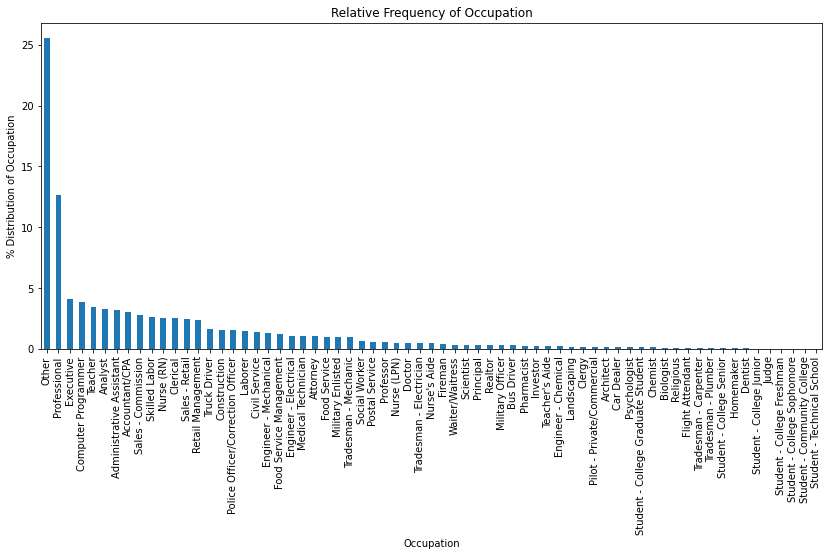

In [30]:
#Plot distribution for occupation
myCountplot('Occupation',rot=90)

<div align="center">Fig 8b: Distribution of Occupation </div>


* Other, professionals are the most occuring, students less occuring.

Distribution of Monthly Loan Payment

In [31]:
loans_df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

In [32]:
loans_df.StatedMonthlyIncome.min()

0.0

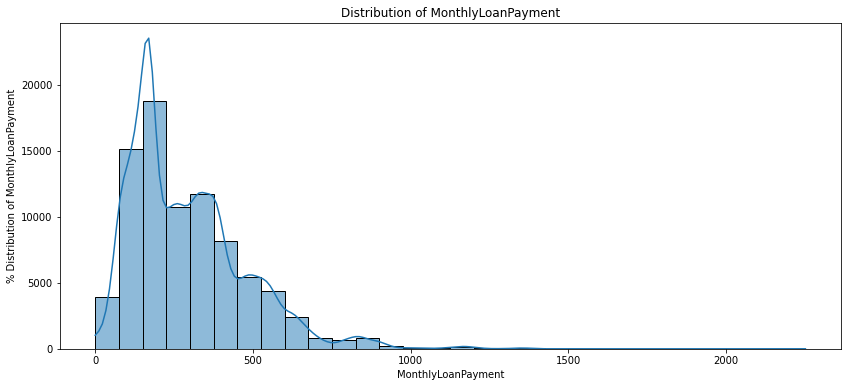

In [33]:
# plot Distribution of MonthlyLoanPayment
myDistribution(loans_df,'MonthlyLoanPayment')

<div align="center">Fig 8b: Distribution of Monthly Payment </div>


* Monthly Payment has a **Right-Skewed** distribution, majorrity of the values are clustered around the lower limit 
* Next is to investigate the relationship between this and LoanStatus

#### Question 8


How many of our Borrowers are Homeowners?

In [34]:
loans_df.columns


Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

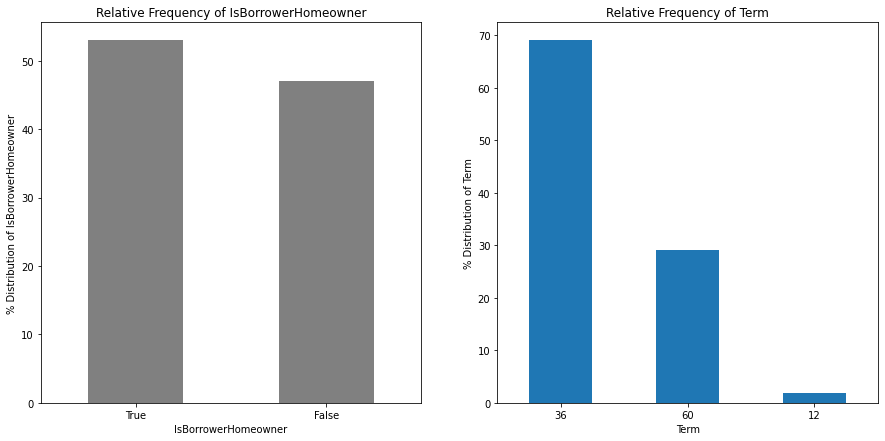

In [35]:


def homeOwner_term():
    """Description: This function plots two BiVariate Plot side by side
    Arguments: 
    No Arguments
    
    
    Returns:
    A graphical reprementation that shows the two plots."""



    

    plt.rcParams['figure.figsize']=[15, 7]

    plt.subplot(1,2,1)


    #Plot for Term
    myCountplot('IsBorrowerHomeowner', figsize=None, color='grey')
    
    


    plt.subplot(1,2,2)

    #Plot for Term

    myCountplot('Term', figsize=None)
    
    
    plt.show()

homeOwner_term()

<div align="center">Fig 9: Relative Frequency of Term and Homeowner </div>


* A little bit *over* `50%` of the population is a *Home Owner*. Homeowner is not one of the features of interest and this is not convincing enough to make an assumption. I would love to investigate further the unemployed population.
* A little bit *under* `70%` of the borrower population has a loan period of *36 months*. *12 months* Loans were hardly subscirbed to. This is a variable of interest.

### Question 9

The **most common** Prosper Score (Alpha)

In [36]:
loans_df.sample(10)


,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,IsBorrowerHomeowner,MonthlyLoanPayment,StatedMonthlyIncome,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatusCategory
20100,60,Current,0.27246,0.2468,Skilled Labor,Employed,8000,False,233.31,3583.333333,C,1,Employed
72410,36,Current,0.19744,0.1605,Professional,Employed,15000,True,527.73,5750.000000,C,1,Employed
97419,36,Current,0.35797,0.3177,Other,Employed,4000,True,173.71,7916.666667,HR,1,Employed
86345,36,Current,0.06726,0.0605,Other,Employed,8000,False,243.56,5000.000000,AA,1,Employed
22454,36,Current,0.20200,0.1799,Other,Other,15000,True,542.21,4750.000000,B,2,Unemployed
61068,60,Current,0.19364,0.1699,Attorney,Employed,14000,False,347.86,5125.000000,B,1,Employed
72368,36,Chargedoff,0.35643,0.3199,Tradesman - Mechanic,Employed,6880,False,299.63,2916.666667,E,3,Employed
37194,36,Current,0.12400,0.1029,Teacher,Full-time,7000,False,226.82,2916.666667,A,1,Employed
733,60,Current,0.16969,0.1465,Other,Employed,20000,False,472.13,5250.000000,B,1,Employed
100859,36,Current,0.07620,0.0629,Police Officer/Correction Officer,Employed,10000,True,305.54,7500.000000,AA,1,Employed


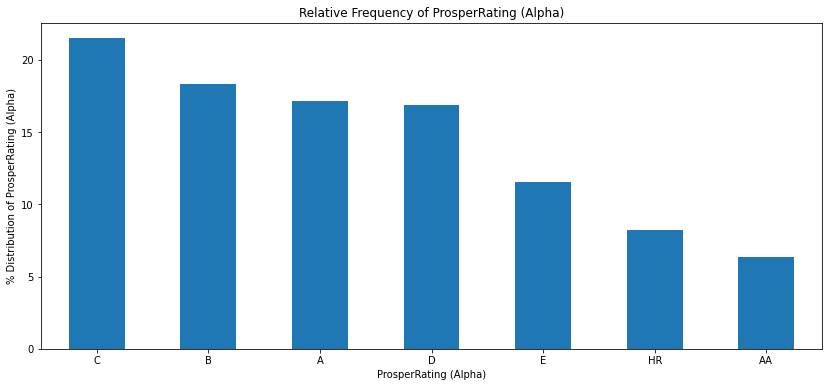

In [37]:
# Plot ProserRating Alpha
myCountplot('ProsperRating (Alpha)',kind='bar')

<div align="center">Fig 10: Frequency Distribution of Prosper Rating </div>


* Prosper Rating 'C' has the most frequency followed by B, while Prosper Rating 'AA' Has the least 


###### Discuss the distribution(s) of the variable(s) of interest. Were there any unusual points? need to perform any transformations?

* I discover that there are similarities in BorrowerAPR and BorrowerRate Charts. This will be further explored in the BiVariate Exploration part of this project. There was no need to make any transformation on the two variables.
* Majority of the Loans are either completed or currently running.
* **Employment Status** is ***not*** a factor that affects **Loan Status** as 90%+ of the population are employed. I wanted to find out one thing, whether borrowers were `employed or not`. This not a variable of interest.

###### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to make transformation to the EmploymentStatus variable. I wanted to know the ratio of employed borrowers to that of the unemployed. I was able group the values into two distinct categories. It's either you are employed or not, irrespective of the type and nature of your employment.

## Bivariate Exploration

> * In this section, I investigate relationships between pairs of variables in the data. Majority of the variables that I cover here have been introduced in some
fashion in the previous section (univariate exploration).


#### Question 10
BorrowerAPR and BorrowerRate

> * One of the things I discover in the first part (Univariate Exploration) is the similarities in the charts  of two variables ['BorrowerAPR', 'BorrowerRate]. I will plot the two together to confirm this and further check for their correlation using Bivariate Visualizations

In [38]:
loans_df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

In [39]:
def myScatter(data=None,x=None, y=None, scatter_kws={'s':1/20}, line_kws={'color':'red'}):
    
    sb.regplot(data=data,x=x,y=y, scatter_kws=scatter_kws)

    plt.title(f'Relationship between {x} and {y}', fontsize=8)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    

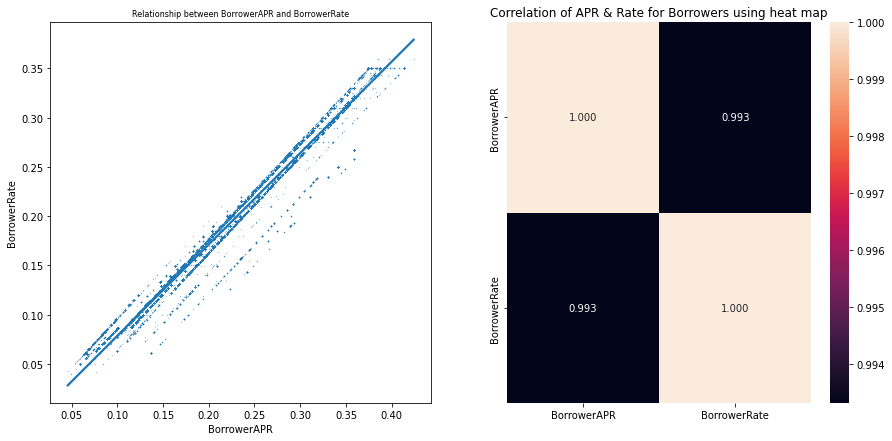

In [40]:
def apr_rate():

    """Description: This function plots two BiVariate Plot side by side
    
    The first plot uses a scatter plot to show the relationship between Variables (Rate & APR)
    The Second plot uses a heatmap to show the correlationi between Variables (Rate & APR)

    Arguments: 
    No Arguments
    
    
    Returns:
    A graphical reprementation that shows the two plots."""
    
    plt.rcParams['figure.figsize']=[15, 7]

    # plot a scatterplot using myScatterplot
    plt.subplot(1,2,1)
    myScatter(data=loans_df,x='BorrowerAPR', y='BorrowerRate')
   
    
    # Plot a heatmap

    plt.subplot(1,2,2)
    apr_rate = ['BorrowerAPR', 'BorrowerRate']
    sb.heatmap(data=loans_df[apr_rate].corr(),annot=True,fmt='.3f')
    plt.title('Correlation of APR & Rate for Borrowers using heat map')
    plt.show()

apr_rate()

<div align="center">Fig 11: Bivariate Visualization of APR and Rate </div>


This confirms my earlier intuition on these two variables as they have a positive correlation. The heatmap shows how close the correlation is to 1, which is a very significant positive Linear Relationship. As BorrowerRate increases, BorrowerAPR increases. This makes sense as BorrowerRate is a factor of BorrowerAPR

### Question 11

Does the **LoanOriginalAmount**  have an influence on the **BorrowerRate/MonthlyLoanPayment**?

In [41]:
loans_df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

In [42]:
loans_df[['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'MonthlyLoanPayment']]

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,MonthlyLoanPayment
1,10000,0.12016,0.0920,318.93
3,10000,0.12528,0.0974,321.45
4,15000,0.24614,0.2085,563.97
5,15000,0.15425,0.1314,342.37
6,3000,0.31032,0.2712,122.67
...,...,...,...,...
113932,10000,0.22354,0.1864,364.74
113933,2000,0.13220,0.1110,65.57
113934,10000,0.23984,0.2150,273.35
113935,15000,0.28408,0.2605,449.55


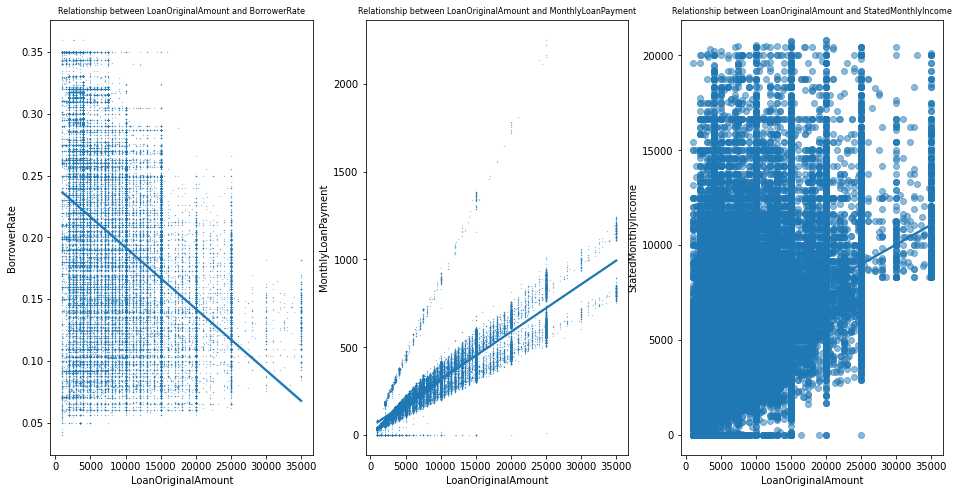

In [43]:
#plot scatter of 'LoanOriginalAmount' against the two variables ['BorrowerRate', 'BorrowerAPR']


def orig_apr():

    """Description: This function plots three BiVariate Plot side by side

    The first plot uses a scatter plot to show the relationship between Variables (Rate & LoanOriginalAmount)
    The Second plot uses a scatter plot to show the relationship between Variables (LoanOriginalAmount & MonthlyLoanPayment)
    The third plot uses a scatter plot to show the relatioinship between Variables (LoanOriginalAmount & StatedMonthlyIncome)

    
    Arguments: 
    No Arguments
    
    Returns:
    A graphical reprementation that shows the frequency of the variable."""
    plt.subplots(figsize=[16,8])
    plt.subplot(1,3,1)

    # use a sample

    loans_df_subset = loans_df.query('StatedMonthlyIncome<StatedMonthlyIncome.quantile(0.99)')
   
    
    # plot a scatter plot
    myScatter(data=loans_df_subset, x='LoanOriginalAmount', y= 'BorrowerRate')
    

    plt.subplot(1,3,2)
    myScatter(data=loans_df_subset, x='LoanOriginalAmount', y= 'MonthlyLoanPayment')
  


    plt.subplot(1,3,3)
    myScatter(data=loans_df_subset, x='LoanOriginalAmount', y= 'StatedMonthlyIncome',scatter_kws={"alpha":1/2})

    plt.show()

orig_apr()

<div align="center">Fig 12: Bivariate Visualization of LoanOriginalAmount Vs BorrowerRate/MonthlyLoanPayment </div>


* **LoanOriginalAmount** and **BorrowerAPR** have a **Negative** Correlation.
* An interesting observation, as 'LoanOriginalAmount' increase, 'BorrowerRate' decreases.
* No need to check for BorrowerAPR as I have established that both Rates have a positive correlation

* **LoanOriginalAmount** and **MonthlyLoanPayment** have a **Positive** Correlation.

* **LoanOriginalAmount** and **StatedMonthlyIncome** have a **Weak Positive** Correlation.

* A heatmap could give Further insights into this three variables, however for this question, the above will be sufficient

### Question 12

Does **loan status** have anything to do **BorrowerRate?**
* Does the **BorrowerRate** have an influence on the completion status of the Loan?

In [44]:
loans_df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

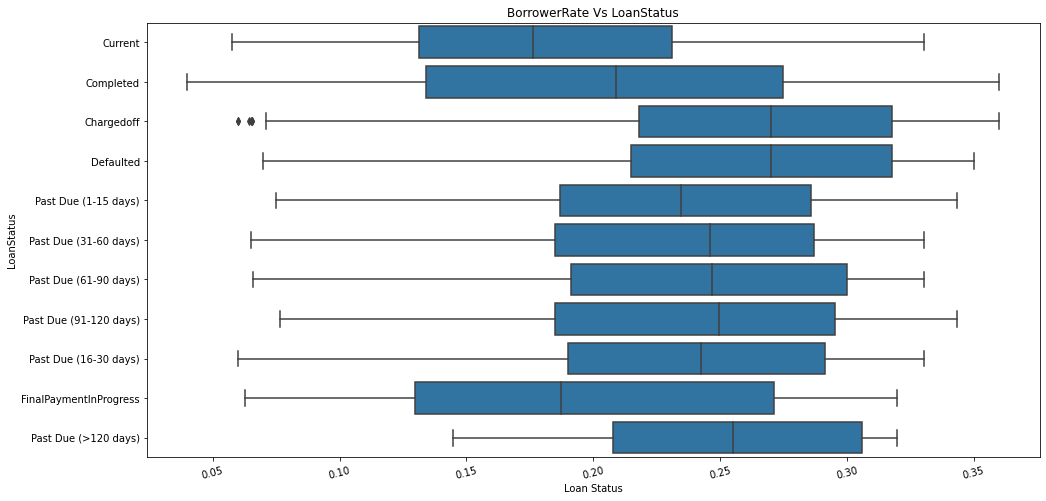

In [45]:

# plot a bivariate plot for the two qualitative variables using boxplot
def ls_rate():
    """Description: This function a Box Plot for a variable
    


    Arguments: 
    No Arguments
    
    
    Returns:
    A graphical reprementation that is a Box plot."""

    plt.subplots(figsize=[16,8])

    base_color=sb.color_palette()[0]

    stat_order=loans_df.LoanStatus.value_counts().index


    
    sb.boxplot(data=loans_df,y='LoanStatus',x='BorrowerRate',color=base_color,order=stat_order)
    plt.title('BorrowerRate Vs LoanStatus')
    plt.xlabel('Loan Status')
    plt.xticks(rotation=15)
    plt.show()

ls_rate()


<div align="center">Fig 13: Bivariate Visualization of LoanStatus Vs BorrowerRate </div>


* Quite Evident, Past Due(>120 days) has the highest minimum rate, while the lowest minimum is in the Completed Status followed by the current status



### Question 13

Does the **Prosper Rating** influence the **LoanStatus**?

In [46]:
loans_df[['LoanStatus', 'ProsperRating (Alpha)']]

,LoanStatus,ProsperRating (Alpha)
1,Current,A
3,Current,A
4,Current,D
5,Current,B
6,Current,E
...,...,...
113932,Current,C
113933,FinalPaymentInProgress,A
113934,Current,D
113935,Completed,C


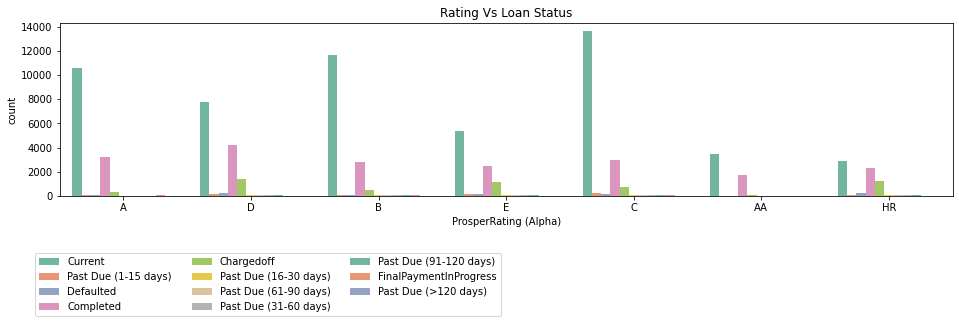

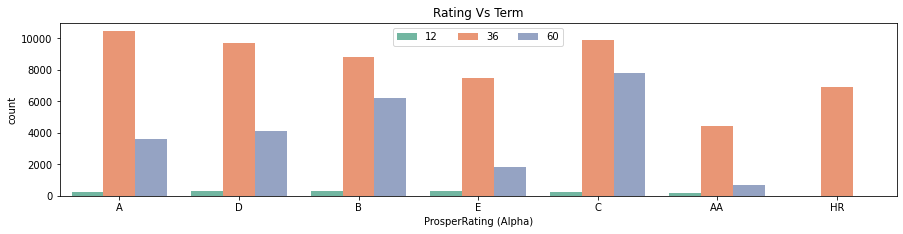

In [47]:



def status_rating():

    """Description: This function plots two BiVariate Plot on each other
    
    The first plot uses a bar plot to show the relationship between Variables (Rate & Loan Status)
    The Second plot uses a bar plot to show the relationship between Variables (Rate & Term)

    Arguments: 
    No Arguments
    
    
    Returns:
    A graphical reprementation that shows the two plots."""
    plt.subplots(figsize=[16,7])

    plt.subplot(2,1,1)


    #Plot First Plot

    sb.countplot(data=loans_df, x='ProsperRating (Alpha)', hue='LoanStatus', palette='Set2')
    plt.title('Rating Vs Loan Status')
    plt.legend(loc=1,ncol=3,bbox_to_anchor=(0.5, -0.3))
    plt.show()
    
  
    #Plot Second Plot

    plt.subplot(2,1,2)
    sb.countplot(data=loans_df, x='ProsperRating (Alpha)', hue='Term', palette='Set2')
    plt.title('Rating Vs Term')
    plt.legend(loc=0, ncol=3)


    plt.show()

status_rating()

<div align="center">Fig 14: Bivariate Visualization of LoanStatus VsProsper Rating </div>


* Prosper Rating C has the highest current status, this might be due to the number of borrowers that subscribed to it. However, Prosper Rating 'D' is the most completed count
* ProsperRating A represents the Majority of the 36 months Loan term which is the most subscribed, 

###### How did the feature(s) of interest vary with other features in the dataset?

* I dug deeper to understand the similarities that I Observed in the Univariate Visualizations of two variables 'BorrowerRate' & 'BorrowerAPR'. Using a scatterplot, I was able to establish that there is a positive linear relationship between these two variables. 


* Interestingly, LoanOriginalAmount has a Negative Correlation with Rates(BorrrowerRate and BorrowerAPR). 
    - It means some borrowers with higher loan amount get lower rates compared to others. The decrease/increase in loan amount doesnt have a direct relationship with the Rates
    * Next Step would be to investigate further into the phenomenon

* Also, LoanOriginalAmount has a Positive Correlation with MonthlyLoanPayment. This is expected
    

> Also, I tried to see if there is any variable that has any other influence on the Rates and also more importantly, how these two influence a loan’s outcome status.



###### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* LoanOriginalAmount has a Positive Correlation with MonthlyLoanPayment and with StatedMonthlyIncome. 
* It is safe to assume that both MonthlyLoanPayment and StatedMonthlyIncome have Positive Correlation.
* Yes, Prosper Rating C & B are the most subscribed, Rating D is the most completed, further investigation to establish the ratio of each loan status for Prosper Rating.

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even
further.

### Question 14

LoanStatus Vs BorrowerRate/LoanAmount for each Term

In [48]:
loans_df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation',
       'EmploymentStatus', 'LoanOriginalAmount', 'IsBorrowerHomeowner',
       'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatusCategory'],
      dtype='object')

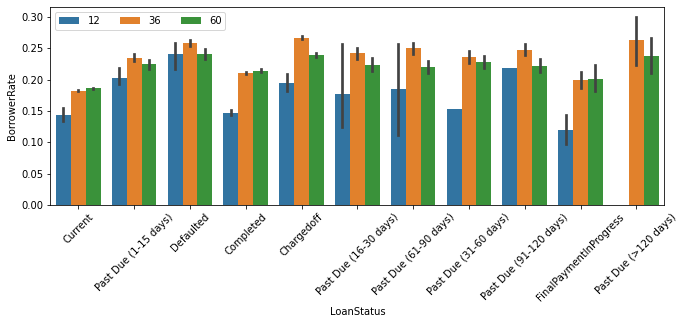

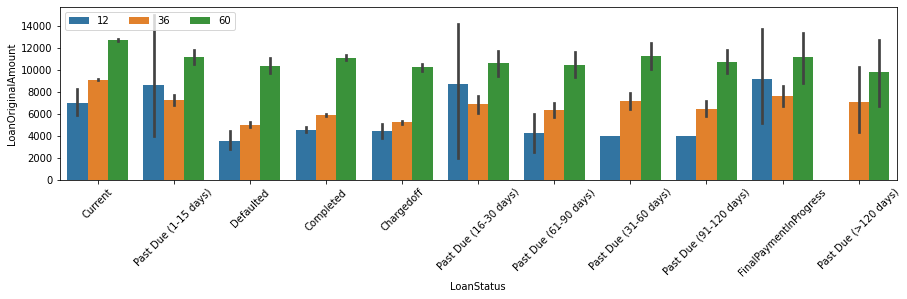

In [49]:
def statrate_term():
    plt.subplots(figsize=[11,8])
    plt.subplot(2,1,1)
    sb.barplot(data=loans_df,x='LoanStatus',y='BorrowerRate',hue='Term')
    plt.xticks(rotation=45)
    plt.legend(loc=0, ncol=3)
    plt.show()
    



    plt.subplot(2,1,2)
    # plt.subplots(figsize=[11,6])
    sb.barplot(data=loans_df,x='LoanStatus',y='LoanOriginalAmount',hue='Term')
    plt.xticks(rotation=45)
    plt.legend(loc=0, ncol=3)
    plt.show()


statrate_term()

<div align="center">Fig 15: MultiVariate Visualization of LoanStatus Vs BorrowerRate for each Term </div>


* Across all loan terms, ***Positive Loan Status*** have lower rates especially for the 12 months loan
* For example, 12 months loans with ***Negative Loan Status*** have rates higher than 15% while the reverse is the case for the ***Positive Loan Status***. This is predominant for other loan terms
* I can assume that lower BorrowerRate is a factor of ***Positive Loan Status***
* 60 months term has the highest Loan Amount across all status.

### Question 15
What Term and ProsperRating influences Loan Status?

In [50]:
loans_df['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

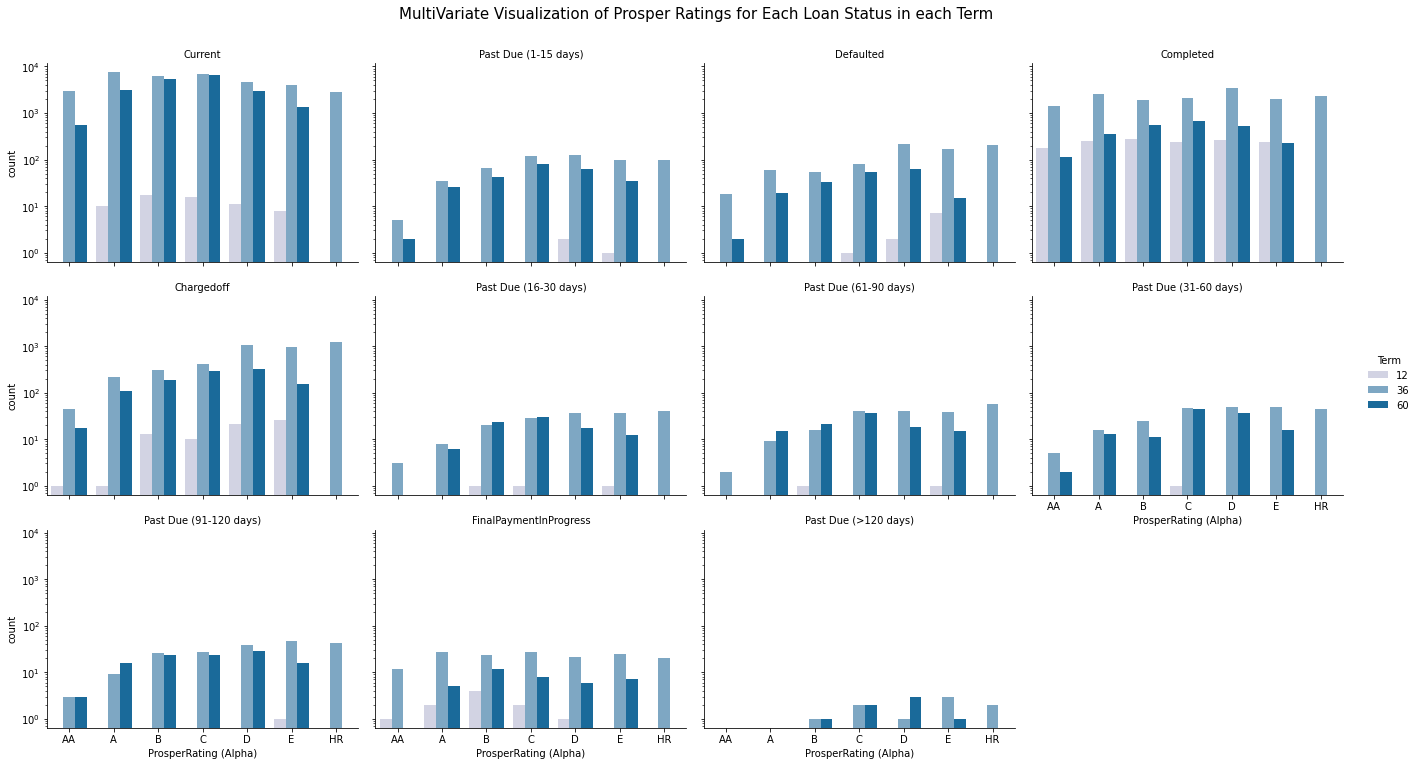

In [51]:

# plot on Grid
def rating_status():
    rating_order=['AA','A', 'B', 'C', 'D','E','HR']
    g = sb.catplot(x='ProsperRating (Alpha)', order= rating_order, hue="Term",hue_order=[12,36,60],  col="LoanStatus",
                data=loans_df, kind="count",
                height=4, palette='PuBu',col_wrap=4,
                dodge=True).set(yscale = 'log');

    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    plt.suptitle("MultiVariate Visualization of Prosper Ratings for Each Loan Status in each Term", fontsize=15, y=1.05);
    g.fig.set_size_inches(20,10)

rating_status()

<div align="center">Fig 16: MultiVariate Visualization of Prosper Ratings for Each Loan Status in each Term </div>


* As earlier established, *Current* and *Completed* **respectively** are still the most occuring **Loan Status** even across all prosper ratings, 
* However, Even though there are few counts, *12 months* loans have more completed than they have currently running.
* Prosper Rating C represents the majority, Rating D has the best completion ratio.


<a id='conclusions'></a>
## Conclusions
To conclude, Majority of the loans have Positive Loan Status which means they are healthy. Even though, the most subscribed is the 36 months, 12 months loan have a very good rate of completion

The investigation showed that LoanStatus, Current and Completed that are elements in my assumed **Positive Loan Status** are the most occuring and also have the lowest Rates. BorrowerRate and BorrowerAPR have a positive correlation
Across all terms the Frequency and Order of the Loan Status have always been consistent with only the exception of 12 months loans, having more completed than current.

Prosper Rating C represents the majority, Rating D has the best completion ratio.


In [52]:
# # Use this command if you are running this file in local
# !jupyter nbconvert Part_I_exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_exploration.ipynb to slides
[NbConvertApp] Writing 1468530 bytes to Part_I_exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_I_exploration.slides.html
Use Control-C to stop this server
^C

Interrupted
